Here is the heat map showing an extensive amount of correlation

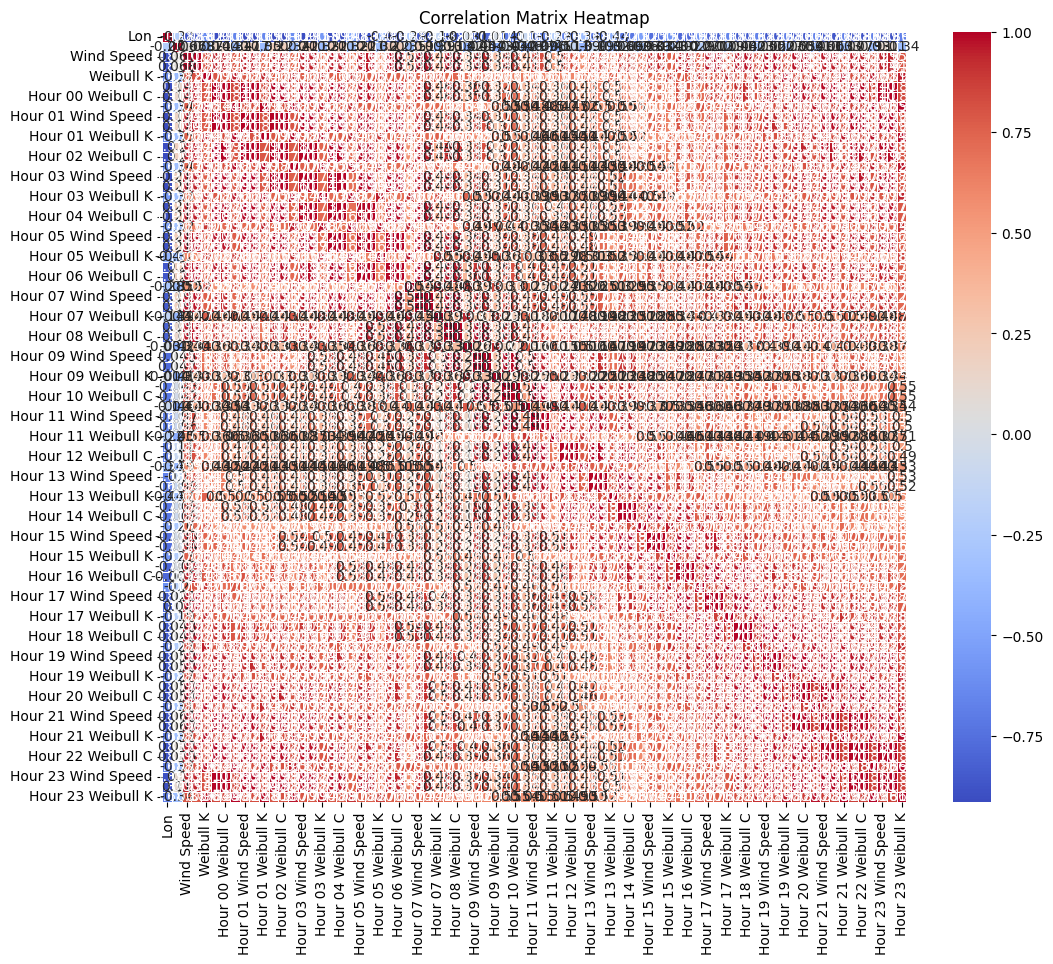

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./wind_speed_annual/wind_speed_annual.csv")

df.drop(['Block'], axis=1, inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [10]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Use a regular expression to replace numbers with an empty string
# df['Block'] = df['Block'].str.replace('\d+', '', regex=True)

# print(df['Block'].head())

# Set the threshold
threshold = 0.90

# List to keep track of columns to drop
columns_to_drop = set()

# Iterate over the columns of the correlation matrix
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[j]
            columns_to_drop.add(colname)

# Drop the identified columns
reduced_df = df.drop(columns=columns_to_drop)

print(f"Original dataframe had {df.shape[1]} columns. Reduced dataframe has {reduced_df.shape[1]} columns.")
print(reduced_df.head())

Original dataframe had 77 columns. Reduced dataframe has 6 columns.
       Lon      Lat  Wind Speed  Weibull K  Hour 10 Weibull K  \
0 -83.0406  23.8024        7.32       2.50               2.38   
1 -83.0086  23.8029        7.32       2.50               2.36   
2 -83.4677  23.8398        7.34       2.48               2.40   
3 -83.4203  23.8405        7.33       2.48               2.38   
4 -83.3729  23.8413        7.33       2.48               2.36   

   Hour 11 Weibull K  
0               2.30  
1               2.28  
2               2.32  
3               2.34  
4               2.34  


Let's collect some statistics!

In [11]:

statistics_df = reduced_df.drop(df.columns[0], axis=1)
mean_values = statistics_df.mean()
median_values = statistics_df.median()
mode_values = statistics_df.mode().iloc[0]
std_dev = statistics_df.std()
variance = statistics_df.var()
range_values = statistics_df.max() - statistics_df.min()
iqr = statistics_df.quantile(0.75) - statistics_df.quantile(0.25)



print(f"Mean: \n{mean_values}\n")
print(f"Median: \n{median_values}\n")
print(f"Mode: \n{mode_values}\n")
print(f"Standard Deviation: \n{std_dev}\n")
print(f"Variance: \n{variance}\n")
print(f"Range: \n{range_values}\n")
print(f"Interquartile Range: \n{iqr}\n")



Mean: 
Lat                  27.347716
Wind Speed            6.968373
Weibull K             2.151248
Hour 10 Weibull K     2.148891
Hour 11 Weibull K     2.138107
dtype: float64

Median: 
Lat                  27.3475
Wind Speed            6.9600
Weibull K             2.1200
Hour 10 Weibull K     2.1400
Hour 11 Weibull K     2.1400
dtype: float64

Mode: 
Lat                  26.4757
Wind Speed            6.9200
Weibull K             2.0400
Hour 10 Weibull K     2.1400
Hour 11 Weibull K     2.1400
Name: 0, dtype: float64

Standard Deviation: 
Lat                  1.366301
Wind Speed           0.402487
Weibull K            0.135068
Hour 10 Weibull K    0.070551
Hour 11 Weibull K    0.084922
dtype: float64

Variance: 
Lat                  1.866778
Wind Speed           0.161996
Weibull K            0.018243
Hour 10 Weibull K    0.004977
Hour 11 Weibull K    0.007212
dtype: float64

Range: 
Lat                  6.4646
Wind Speed           2.4300
Weibull K            0.7800
Hour 10 Weibull K  

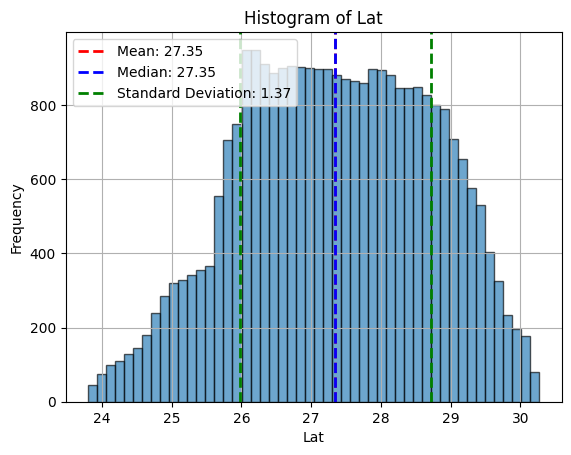

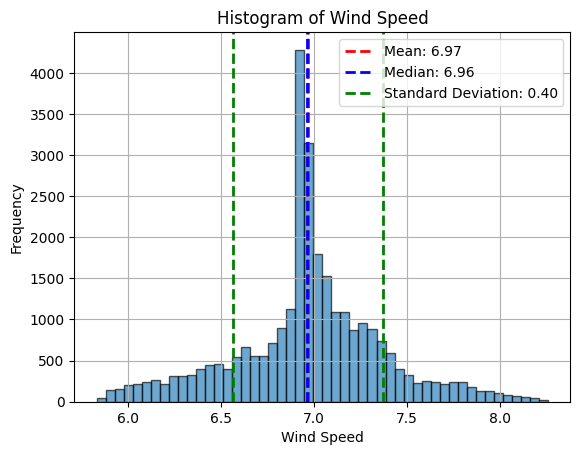

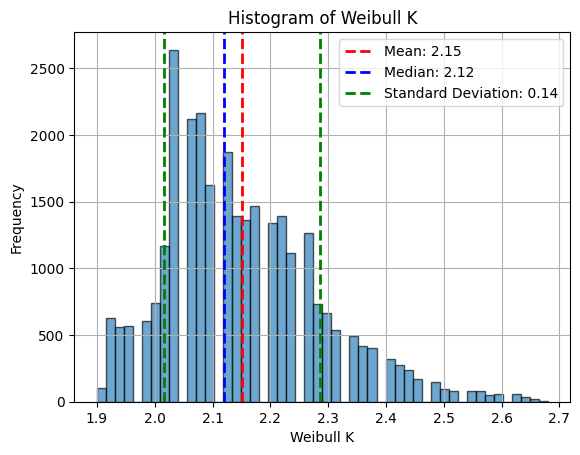

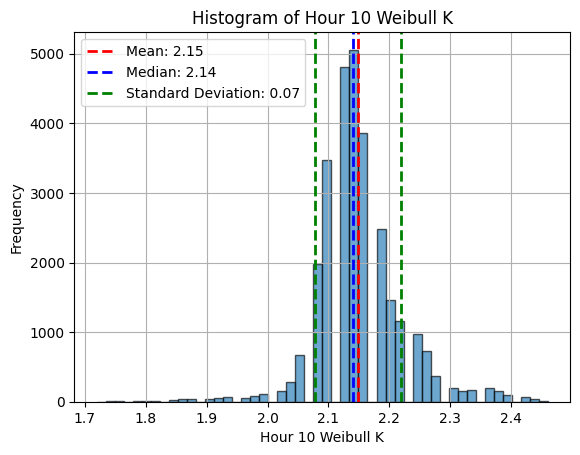

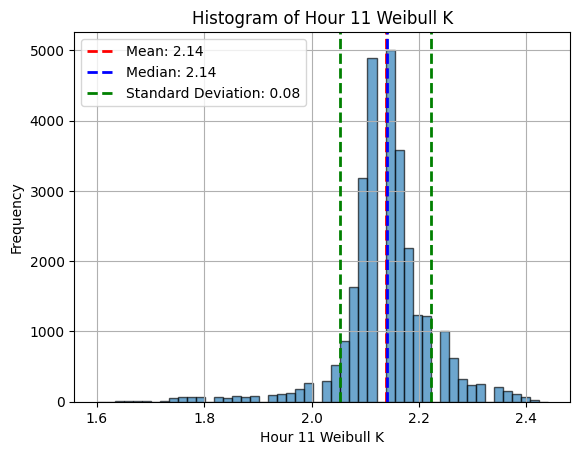

In [12]:
import matplotlib.pyplot as plt

df = reduced_df

statistics_df = reduced_df.drop(df.columns[0], axis=1)
mean_values = statistics_df.mean()
median_values = statistics_df.median()
std_dev = statistics_df.std()

for column in statistics_df.columns:
    plt.hist(df[column].dropna(), bins=50, edgecolor='k', alpha=0.65)
    plt.axvline(mean_values[column], color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_values[column]:.2f}')
    plt.axvline(median_values[column], color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_values[column]:.2f}')
    plt.axvline(mean_values[column] + std_dev[column], color='green', linestyle='dashed', linewidth=2, label=f'Standard Deviation: {std_dev[column]:.2f}')
    plt.axvline(mean_values[column] - std_dev[column], color='green', linestyle='dashed', linewidth=2)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


In [1]:
from scipy import stats

sample = df.sample(50)  # Taking a sample of 50 rows

sample_mean = sample['Wind Speed'].mean()
sample_std = sample['Wind Speed'].std()
conf_interval = stats.norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(50))
print(f"95% Confidence Interval for Wind Speed: {conf_interval}")


t_stat, p_value = stats.ttest_1samp(sample['Wind Speed'], df['Wind Speed'].mean())
print(f"t-statistic: {t_stat}, p-value: {p_value}")
print(f"Hypothesis test result: {p_value_external < 0.05}")


NameError: name 'df' is not defined

In [ ]:
external_sample = df['Wind Speed'] + np.random.normal(0, 5, size=len(df))

external_sample_mean = external_sample.mean()
external_sample_std = external_sample.std()
conf_interval_external = stats.norm.interval(0.95, loc=external_sample_mean, scale=external_sample_std/np.sqrt(len(external_sample)))
print(f"95% Confidence Interval for External Sample's Wind Speed: {conf_interval_external}")


t_stat_external, p_value_external = stats.ttest_1samp(external_sample, df['Wind Speed'].mean())
print(f"t-statistic for external sample: {t_stat_external}, p-value: {p_value_external}")
print(f"Hypothesis test result: {p_value_external < 0.05}")


95% Confidence Interval for External Sample's Wind Speed: (6.913289898733626, 7.028286407077405)
t-statistic for external sample: 0.08231761648690651, p-value: 0.9343947121914626
Hypothesis test result: False


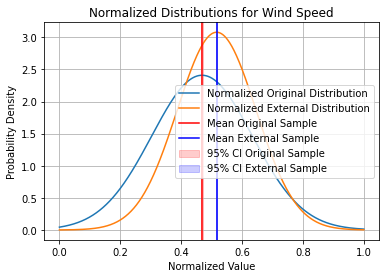

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Wind Speed' is the column of interest
# Normalize function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Normalize the original data
normalized_original = normalize(df['Wind Speed'])
mean_normalized_original = normalized_original.mean()
std_dev_normalized_original = normalized_original.std()
n_normalized_original = len(normalized_original)
SE_normalized_original = std_dev_normalized_original / np.sqrt(n_normalized_original)

# External sample data (normalization applied here as well)
normalized_external_sample = normalize(df['Wind Speed'] + np.random.normal(0, 5, size=len(df)))
normalized_external_sample_mean = normalized_external_sample.mean()
normalized_external_sample_std = normalized_external_sample.std()
SE_normalized_external_sample = normalized_external_sample_std / np.sqrt(len(normalized_external_sample))

# Confidence intervals for normalized data
conf_interval_normalized_original = stats.norm.interval(0.95, loc=mean_normalized_original, scale=SE_normalized_original)
conf_interval_normalized_external = stats.norm.interval(0.95, loc=normalized_external_sample_mean, scale=SE_normalized_external_sample)

# Plotting
x = np.linspace(0, 1, 1000)  # Adjusted for normalized data
plt.plot(x, stats.norm.pdf(x, mean_normalized_original, std_dev_normalized_original), label="Normalized Original Distribution")
plt.plot(x, stats.norm.pdf(x, normalized_external_sample_mean, normalized_external_sample_std), label="Normalized External Distribution")

# Plotting means and confidence intervals
plt.axvline(mean_normalized_original, color='r', linestyle='-', label="Mean Original Sample")
plt.axvline(normalized_external_sample_mean, color='b', linestyle='-', label="Mean External Sample")
plt.axvspan(conf_interval_normalized_original[0], conf_interval_normalized_original[1], color='r', alpha=0.2, label="95% CI Original Sample")
plt.axvspan(conf_interval_normalized_external[0], conf_interval_normalized_external[1], color='b', alpha=0.2, label="95% CI External Sample")

# Adjusting the plot for better visualization
plt.title("Normalized Distributions for Wind Speed")
plt.xlabel("Normalized Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
# plt.tight_layout()
plt.show()


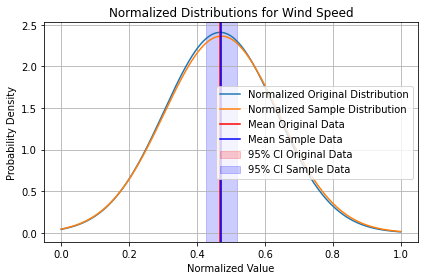

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Simulating the original data for demonstration purposes
# df = pd.DataFrame({"Wind Speed": np.random.normal(7.33, 2, 500)})

# Function to normalize data
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Normalize the original data
normalized_original = normalize(df['Wind Speed'])
mean_normalized_original = normalized_original.mean()
std_dev_normalized_original = normalized_original.std()
n_normalized_original = len(normalized_original)
SE_normalized_original = std_dev_normalized_original / np.sqrt(n_normalized_original)
conf_interval_normalized_original = stats.norm.interval(0.95, loc=mean_normalized_original, scale=SE_normalized_original)

# Sample data (normalized)
# sample = normalized_original.sample(50)
normalized_sample = normalize(sample['Wind Speed'])
sample_mean_normalized = normalized_sample.mean()
sample_std_normalized = normalized_sample.std()
SE_normalized_sample = sample_std_normalized / np.sqrt(50)
conf_interval_normalized_sample = stats.norm.interval(0.95, loc=sample_mean_normalized, scale=SE_normalized_sample)

# Plotting the distributions
x = np.linspace(0, 1, 1000)  # Adjusted for normalized data
plt.plot(x, stats.norm.pdf(x, mean_normalized_original, std_dev_normalized_original), label="Normalized Original Distribution")
plt.plot(x, stats.norm.pdf(x, sample_mean_normalized, sample_std_normalized), label="Normalized Sample Distribution")

# Plotting means and confidence intervals
plt.axvline(mean_normalized_original, color='r', linestyle='-', label="Mean Original Data")
plt.axvline(sample_mean_normalized, color='b', linestyle='-', label="Mean Sample Data")
plt.axvspan(conf_interval_normalized_original[0], conf_interval_normalized_original[1], color='r', alpha=0.2, label="95% CI Original Data")
plt.axvspan(conf_interval_normalized_sample[0], conf_interval_normalized_sample[1], color='b', alpha=0.2, label="95% CI Sample Data")

# Adjusting the plot for better visualization
plt.title("Normalized Distributions for Wind Speed")
plt.xlabel("Normalized Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


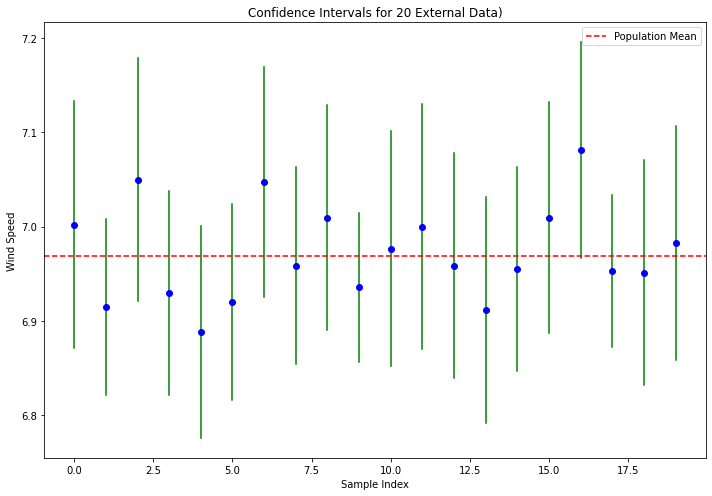

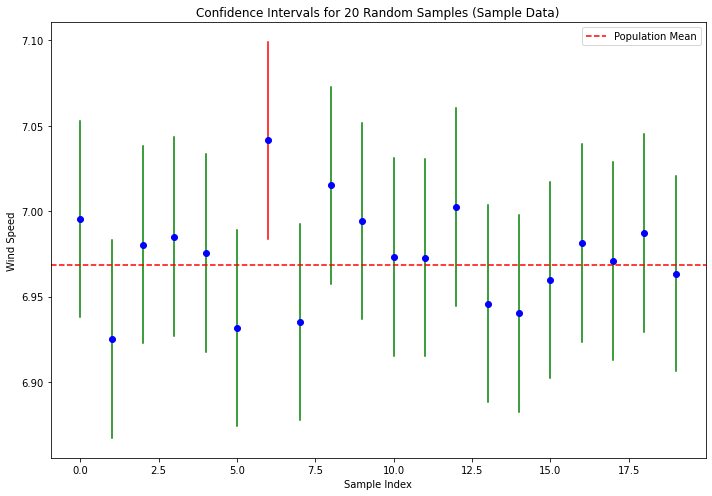

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame
population_mean = df['Wind Speed'].mean()

# For the second snippet
num_samples = 20
sample_size = 50
conf_intervals_2 = []
sample_means_2 = []

for _ in range(num_samples):
    sample = df.sample(sample_size)  # Taking a sample of 50 rows
    sample_mean = sample['Wind Speed'].mean()
    sample_means_2.append(sample_mean)
    sample_std = sample['Wind Speed'].std()
    conf_interval = stats.norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(sample_size))
    conf_intervals_2.append(conf_interval)

# Plotting for second snippet
plt.figure(figsize=(10, 7))
for i, ci in enumerate(conf_intervals_2):
    color = 'green' if ci[0] <= population_mean <= ci[1] else 'red'
    plt.plot([i, i], ci, color=color)
    plt.plot(i, sample_means_2[i], 'bo')

plt.axhline(population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Sample Index')
plt.ylabel('Wind Speed')
plt.title('Confidence Intervals for 20 External Data)')
plt.legend()
plt.tight_layout()
plt.show()

# For the third snippet
conf_intervals_3 = []
sample_means_3 = []

for _ in range(num_samples):
    external_sample = df['Wind Speed'] + np.random.normal(0, 5, size=len(df))
    external_sample_mean = external_sample.mean()
    sample_means_3.append(external_sample_mean)
    external_sample_std = external_sample.std()
    conf_interval_external = stats.norm.interval(0.95, loc=external_sample_mean, scale=external_sample_std/np.sqrt(len(external_sample)))
    conf_intervals_3.append(conf_interval_external)

# Plotting for third snippet
plt.figure(figsize=(10, 7))
for i, ci in enumerate(conf_intervals_3):
    color = 'green' if ci[0] <= population_mean <= ci[1] else 'red'
    plt.plot([i, i], ci, color=color)
    plt.plot(i, sample_means_3[i], 'bo')

plt.axhline(population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Sample Index')
plt.ylabel('Wind Speed')
plt.title('Confidence Intervals for 20 Random Samples (Sample Data)')
plt.legend()
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


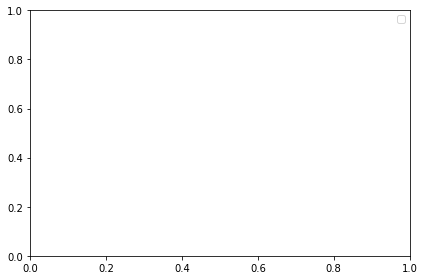

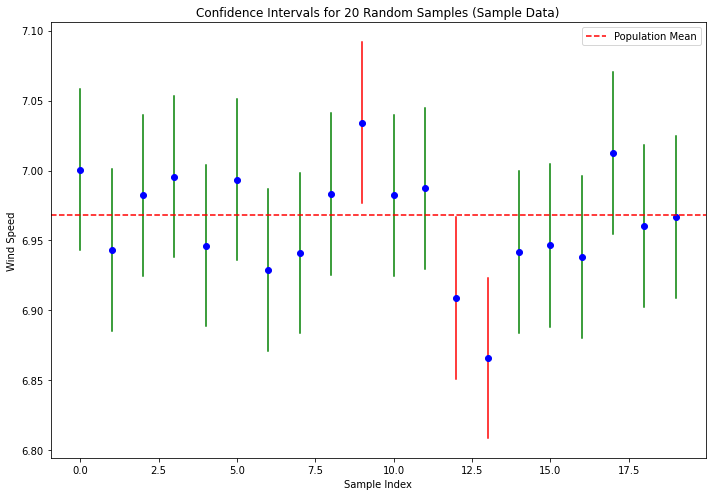

In [ ]:
plt.legend()
plt.tight_layout()
plt.show()

# For the third snippet
conf_intervals_3 = []
sample_means_3 = []

for _ in range(num_samples):
    external_sample = df['Wind Speed'] + np.random.normal(0, 5, size=len(df))
    external_sample_mean = external_sample.mean()
    sample_means_3.append(external_sample_mean)
    external_sample_std = external_sample.std()
    conf_interval_external = stats.norm.interval(0.95, loc=external_sample_mean, scale=external_sample_std/np.sqrt(len(external_sample)))
    conf_intervals_3.append(conf_interval_external)

# Plotting for third snippet
plt.figure(figsize=(10, 7))
for i, ci in enumerate(conf_intervals_3):
    color = 'green' if ci[0] <= population_mean <= ci[1] else 'red'
    plt.plot([i, i], ci, color=color)
    plt.plot(i, sample_means_3[i], 'bo')

plt.axhline(population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Sample Index')
plt.ylabel('Wind Speed')
plt.title('Confidence Intervals for 20 Random Samples (Sample Data)')
plt.legend()
plt.tight_layout()
plt.show()


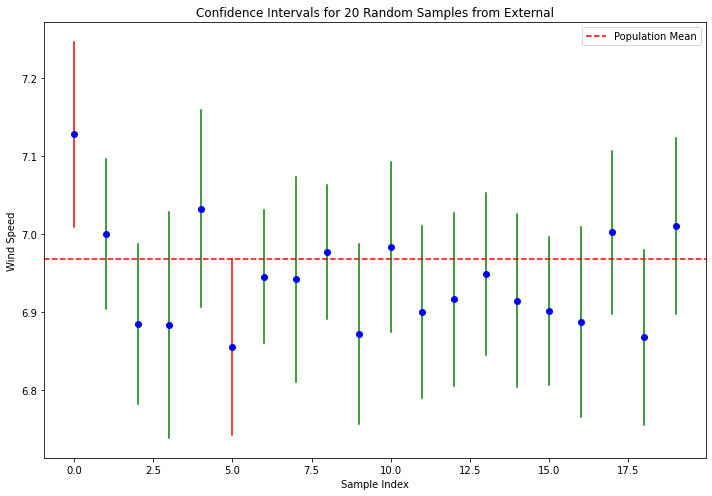

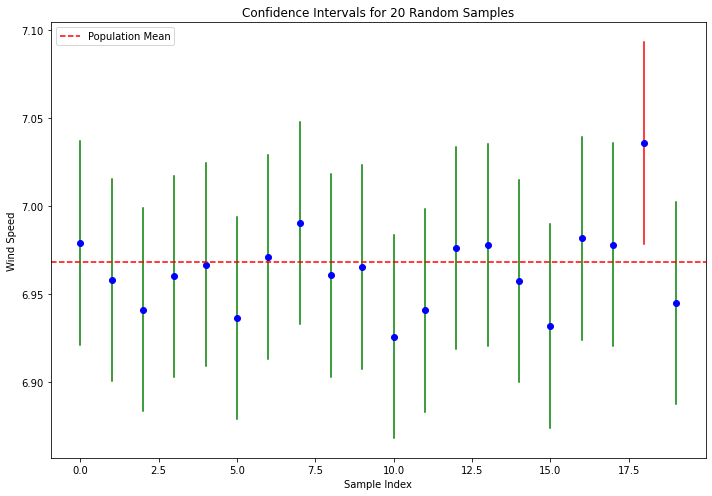

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame
population_mean = df['Wind Speed'].mean()

# For the second snippet
num_samples = 20
sample_size = 50
conf_intervals_2 = []
sample_means_2 = []

for _ in range(num_samples):
    sample = df.sample(sample_size)  # Taking a sample of 50 rows
    sample_mean = sample['Wind Speed'].mean()
    sample_means_2.append(sample_mean)
    sample_std = sample['Wind Speed'].std()
    conf_interval = stats.norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(sample_size))
    conf_intervals_2.append(conf_interval)

# Plotting for second snippet
plt.figure(figsize=(10, 7))
for i, ci in enumerate(conf_intervals_2):
    color = 'green' if ci[0] <= population_mean <= ci[1] else 'red'
    plt.plot([i, i], ci, color=color)
    plt.plot(i, sample_means_2[i], 'bo')

plt.axhline(population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Sample Index')
plt.ylabel('Wind Speed')
plt.title('Confidence Intervals for 20 Random Samples from External')
plt.legend()
plt.tight_layout()
plt.show()

# For the third snippet
conf_intervals_3 = []
sample_means_3 = []

for _ in range(num_samples):
    external_sample = df['Wind Speed'] + np.random.normal(0, 5, size=len(df))
    external_sample_mean = external_sample.mean()
    sample_means_3.append(external_sample_mean)
    external_sample_std = external_sample.std()
    conf_interval_external = stats.norm.interval(0.95, loc=external_sample_mean, scale=external_sample_std/np.sqrt(len(external_sample)))
    conf_intervals_3.append(conf_interval_external)

# Plotting for third snippet
plt.figure(figsize=(10, 7))
for i, ci in enumerate(conf_intervals_3):
    color = 'green' if ci[0] <= population_mean <= ci[1] else 'red'
    plt.plot([i, i], ci, color=color)
    plt.plot(i, sample_means_3[i], 'bo')

plt.axhline(population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Sample Index')
plt.ylabel('Wind Speed')
plt.title('Confidence Intervals for 20 Random Samples')
plt.legend()
plt.tight_layout()
plt.show()
